### Importing libraries

In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import shutil

%matplotlib inline

### Function to detect face and crop the image

In [3]:
def crop_image(path):
    result = []
    
    image = cv2.imread(path)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    face_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")
    eye_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_eye.xml")
    
    faces = face_cascade.detectMultiScale(image_gray, 1.3, 5)
    
    for (x, y, w, h) in  faces:
        face_region = image[y : y+h, x : x+w]
        face_region_gray = image_gray[y : y+h, x : x+w]
        
        eyes = eye_cascade.detectMultiScale(face_region_gray, 1.3, 5)
        
        if len(eyes) >= 2 :
            result.append(face_region)

    return result

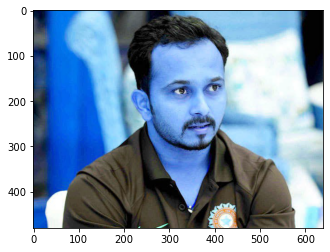

In [4]:
image = cv2.imread("./test_images/4.jpg")
plt.imshow(image)

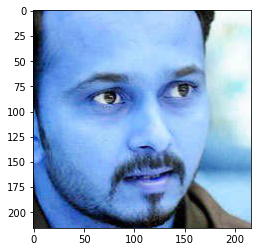

In [5]:
faces = crop_image("./test_images/4.jpg")
plt.imshow(faces[0])

### Processing the image data with the crop function

In [ ]:
path_to_images = "./dataset/images/"
path_to_cropped = "./dataset/cropped/"
image_dirs = []

for entry in  os.scandir(path_to_images):
    if entry.is_dir():
        image_dirs.append(entry.path)

if os.path.exists(path_to_cropped):
    shutil.rmtree(path_to_cropped)

os.path.os.mkdir(path_to_cropped)

In [ ]:
cropped_image_dirs = []

for image_dir in image_dirs:
    count = 1
    name = image_dir.split('/')[3]    
    folder_path = path_to_cropped + name + "/"
    
    if not os.path.exists(folder_path):
        os.mkdir(folder_path)
        cropped_image_dirs.append(folder_path)
    
    for entry in os.scandir(image_dir):
        try:
            faces = crop_image(entry.path)
            if len(faces) != 0:
                cropped = faces[0]
                crop_image_name = name + "_" + str(count) + ".png"
                crop_image_path = folder_path + crop_image_name

                cv2.imwrite(crop_image_path, cropped)
                
                count += 1
        except:
            print(f"ERROR: {entry.path}")


A new cropped directory will contain all the faces of the respective subjects, after this point manual data cleaning is done to remove any bad image